In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, cross_validation
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import random
from sklearn import grid_search
import seaborn as sns
sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth": 3})
%matplotlib inline

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('data-0.1m.csv')

# Data Exploration

In [3]:
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,2006,c-11,c-22,c-3,1316,AA,FAT,DFW,1313,N
1,2004,c-10,c-12,c-2,1242,US,SAN,PHL,2369,N
2,2006,c-5,c-5,c-5,1302,OO,SBP,SFO,191,Y
3,2005,c-8,c-8,c-1,1138,DL,PHL,ATL,665,N
4,2005,c-4,c-3,c-7,1438,DL,ATL,BDL,859,N
5,2005,c-9,c-15,c-4,2311,OH,ATL,EVV,350,N
6,2005,c-6,c-20,c-1,1208,NW,DTW,GRR,120,N
7,2007,c-7,c-8,c-7,1839,WN,PDX,SMF,479,Y
8,2005,c-2,c-27,c-7,1230,OH,PBI,CVG,892,Y
9,2005,c-8,c-17,c-3,1723,UA,LAX,SFO,337,N


In [4]:
df['Month'].unique()

array(['c-11', 'c-10', 'c-5', 'c-8', 'c-4', 'c-9', 'c-6', 'c-7', 'c-2',
       'c-12', 'c-3', 'c-1'], dtype=object)

In [5]:
df['DayofMonth'].unique()

array(['c-22', 'c-12', 'c-5', 'c-8', 'c-3', 'c-15', 'c-20', 'c-27', 'c-17',
       'c-16', 'c-29', 'c-11', 'c-26', 'c-14', 'c-31', 'c-25', 'c-9',
       'c-4', 'c-21', 'c-30', 'c-18', 'c-28', 'c-19', 'c-13', 'c-23',
       'c-2', 'c-6', 'c-10', 'c-1', 'c-24', 'c-7'], dtype=object)

In [6]:
df['UniqueCarrier'].unique()

array(['AA', 'US', 'OO', 'DL', 'OH', 'NW', 'WN', 'UA', 'XE', 'HP', '9E',
       'EV', 'TZ', 'MQ', 'B6', 'DH', 'CO', 'YV', 'FL', 'HA', 'AQ', 'AS',
       'F9'], dtype=object)

In [7]:
df['Origin'].unique()

array(['FAT', 'SAN', 'SBP', 'PHL', 'ATL', 'DTW', 'PDX', 'PBI', 'LAX',
       'SLC', 'EWR', 'RAP', 'ROC', 'MDT', 'BNA', 'DEN', 'DCA', 'PWM',
       'SFO', 'ISP', 'DAL', 'ORD', 'MCO', 'BGR', 'SJT', 'CLE', 'PHX',
       'SJC', 'TUP', 'CVG', 'BUF', 'ELP', 'ICT', 'TYS', 'PIT', 'MTJ',
       'BOI', 'DFW', 'IAH', 'JFK', 'SEA', 'MEM', 'CMH', 'ILM', 'MDW',
       'MIA', 'JAN', 'BDL', 'HNL', 'OKC', 'RDU', 'MCI', 'KOA', 'BWI',
       'IAD', 'AUS', 'OAK', 'SYR', 'MSN', 'LAS', 'ORF', 'SMF', 'LGA',
       'LIT', 'RIC', 'GRR', 'CLT', 'RNO', 'ONT', 'XNA', 'PVD', 'TPA',
       'GSP', 'PSP', 'JAX', 'SAT', 'BOS', 'BTR', 'STL', 'SAV', 'FLL',
       'OME', 'GRB', 'ABQ', 'MSY', 'EGE', 'LBB', 'OMA', 'CHO', 'SGF',
       'GJT', 'MSP', 'MOB', 'LGB', 'SNA', 'DSM', 'MFR', 'ALB', 'PNS',
       'OAJ', 'LNK', 'BUR', 'SHV', 'ROA', 'GPT', 'ANC', 'MRY', 'MHT',
       'VPS', 'BTV', 'GSO', 'MKE', 'CHS', 'HPN', 'OGG', 'ACT', 'HOU',
       'TVC', 'HSV', 'PHF', 'EUG', 'ABE', 'CDV', 'AVL', 'IND', 'RSW',
       'AVP', 'MGM',

# Vectorizing
Vectorizing the variables using pandas get_dummies(). Only works if you do it on the whole data before splitting into train and test.

In [8]:
cat_keys = ['Month', 'DayofMonth', 'UniqueCarrier', 'Origin', 'Dest']

In [9]:
X = df.drop('dep_delayed_15min',1)

In [10]:
X_cat = pd.get_dummies(X[cat_keys])

In [11]:
num_keys = ['DepTime','Distance']

In [12]:
X_num = X[num_keys]

In [13]:
X_vec = pd.concat([X_num,X_cat],1)

In [14]:
X_vec.head()

,DepTime,Distance,Month_c-1,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,Month_c-5,...,Dest_VCT,Dest_VIS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,1316,1313,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1242,2369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1302,191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1138,665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1438,859,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
y = df['dep_delayed_15min'].apply(lambda x: 0 if x == 'N' else 1)

# Splitting into train, test and (out-of-time) validation set

In [16]:
X_val = X_vec.loc[df[df['Year'] == 2007].index]
y_val = y.loc[df[df['Year'] == 2007].index]

In [17]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_vec.loc[df[df['Year'] != 2007].index],y.loc[df[df['Year'] != 2007].index])

In [18]:
len(y_val)

25719

In [19]:
len(y_train)

55710

In [20]:
len(y_test)

18571

# Overfitting
Random Forest will over-fit out of the box

In [21]:
model_cross = RandomForestClassifier(n_jobs=-1)

In [22]:
model_cross.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
y_prob_train = model_cross.predict_proba(X_train)

In [24]:
y_prob_test = model_cross.predict_proba(X_test)

In [25]:
fpr_train, tpr_train, _ = metrics.roc_curve(y_train,y_prob_train[:,1])
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [26]:
fpr_test, tpr_test, _ = metrics.roc_curve(y_test,y_prob_test[:,1])
roc_auc_test = metrics.auc(fpr_test, tpr_test)

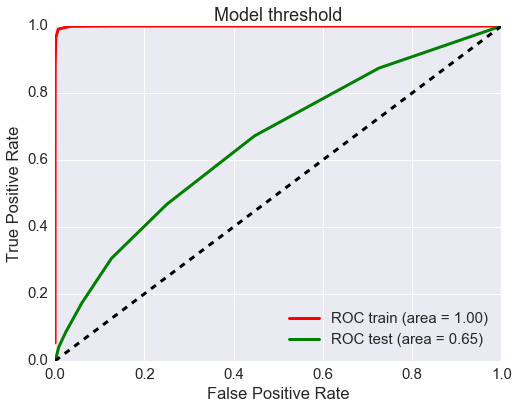

In [27]:
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, color = 'r')
plt.plot(fpr_test, tpr_test, color = 'g')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model threshold')
green_line = mlines.Line2D([], [], color='green', label='ROC test (area = %0.2f)' % np.mean(roc_auc_test))
red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train)
plt.legend(handles=[red_line, green_line],loc="lower right")
plt.savefig('ROC_overfit.pdf')

In [28]:
roc_auc_train

0.9995213098360094

In [29]:
roc_auc_test

0.65424060593567601

In [30]:
y_prob_val = model_cross.predict_proba(X_val)

In [31]:
fpr_val, tpr_val, _ = metrics.roc_curve(y_val,y_prob_val[:,1])
roc_auc_val = metrics.auc(fpr_val, tpr_val)

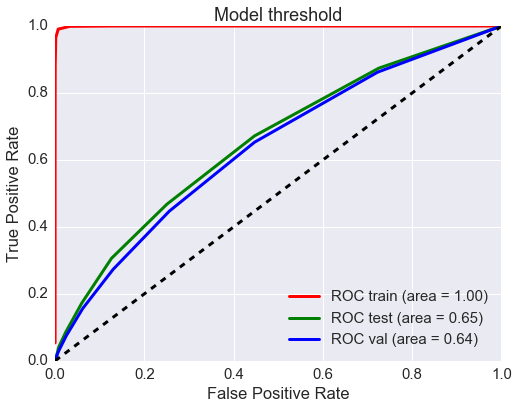

In [32]:
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, color = 'r')
plt.plot(fpr_test, tpr_test, color = 'g')
plt.plot(fpr_val, tpr_val, color = 'b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model threshold')
green_line = mlines.Line2D([], [], color='green', label='ROC test (area = %0.2f)' % np.mean(roc_auc_test))
blue_line = mlines.Line2D([], [], color='blue', label='ROC val (area = %0.2f)' % np.mean(roc_auc_val))
red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train)
plt.legend(handles=[red_line, green_line, blue_line],loc="lower right")
plt.savefig('ROC_overfit_val.pdf')

# Random Subsampling
We will need to tune parameters using a grid search and cross-validation.
If training takes to long, take a random subsample for tuning parameters

In [33]:
num = 10000 #number of samples
sub_ind = random.sample(list(X_vec.index),num)

In [34]:
X_vec_10k = X_vec.loc[sub_ind]

In [35]:
y_10k = y.loc[sub_ind]

# Grid Search on subsample

In [36]:
rf = RandomForestClassifier()

In [37]:
parameters = {'n_estimators': [10,100,500],'max_depth':[5,15,25],'min_samples_leaf':[10,20,50]}

In [38]:
model_cv_grid = grid_search.GridSearchCV(rf,parameters,scoring='roc_auc',verbose=2,n_jobs=-1)

In [39]:
model_cv_grid.fit(X_vec_10k,y_10k)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] n_estimators=10, max_depth=5, min_samples_leaf=10 ...............
[CV] n_estimators=10, max_depth=5, min_samples_leaf=10 ...............
[CV] n_estimators=10, max_depth=5, min_samples_leaf=10 ...............
[CV] ...... n_estimators=10, max_depth=5, min_samples_leaf=10 -   0.3s
[CV] ...... n_estimators=10, max_depth=5, min_samples_leaf=10 -   0.4s
[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............
[CV] ...... n_estimators=10, max_depth=5, min_samples_leaf=10 -   0.3s
[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............
[CV] n_estimators=100, max_depth=5, min_samples_leaf=10 ..............
[CV] n_estimators=500, max_depth=5, min_samples_leaf=10 ..............
[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=10 -   1.2s
[CV] n_estimators=500, max_depth=5, min_samples_leaf=10 ..............
[CV] ..... n_estimators=100, max_depth=5, min_samples_leaf=10 -   1.2s
[CV] n_estimator

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.9s


[CV] ..... n_estimators=10, max_depth=15, min_samples_leaf=20 -   0.3s
[CV] n_estimators=10, max_depth=15, min_samples_leaf=20 ..............
[CV] ..... n_estimators=10, max_depth=15, min_samples_leaf=20 -   0.3s
[CV] n_estimators=10, max_depth=15, min_samples_leaf=20 ..............
[CV] ..... n_estimators=10, max_depth=15, min_samples_leaf=20 -   0.3s
[CV] n_estimators=100, max_depth=15, min_samples_leaf=20 .............
[CV] .... n_estimators=100, max_depth=15, min_samples_leaf=20 -   1.9s
[CV] n_estimators=100, max_depth=15, min_samples_leaf=20 .............
[CV] .... n_estimators=100, max_depth=15, min_samples_leaf=20 -   1.8s
[CV] n_estimators=100, max_depth=15, min_samples_leaf=20 .............
[CV] .... n_estimators=100, max_depth=15, min_samples_leaf=20 -   1.9s
[CV] n_estimators=500, max_depth=15, min_samples_leaf=20 .............
[CV] .... n_estimators=500, max_depth=15, min_samples_leaf=10 -  10.1s
[CV] n_estimators=500, max_depth=15, min_samples_leaf=20 .............
[CV] .

[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 100, 500], 'max_depth': [5, 15, 25], 'min_samples_leaf': [10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [40]:
model_cv_grid.grid_scores_

[mean: 0.61253, std: 0.01260, params: {'n_estimators': 10, 'max_depth': 5, 'min_samples_leaf': 10},
 mean: 0.66800, std: 0.01336, params: {'n_estimators': 100, 'max_depth': 5, 'min_samples_leaf': 10},
 mean: 0.67739, std: 0.01160, params: {'n_estimators': 500, 'max_depth': 5, 'min_samples_leaf': 10},
 mean: 0.63213, std: 0.04621, params: {'n_estimators': 10, 'max_depth': 5, 'min_samples_leaf': 20},
 mean: 0.66968, std: 0.01473, params: {'n_estimators': 100, 'max_depth': 5, 'min_samples_leaf': 20},
 mean: 0.67684, std: 0.01303, params: {'n_estimators': 500, 'max_depth': 5, 'min_samples_leaf': 20},
 mean: 0.62585, std: 0.00826, params: {'n_estimators': 10, 'max_depth': 5, 'min_samples_leaf': 50},
 mean: 0.66792, std: 0.00341, params: {'n_estimators': 100, 'max_depth': 5, 'min_samples_leaf': 50},
 mean: 0.67549, std: 0.01078, params: {'n_estimators': 500, 'max_depth': 5, 'min_samples_leaf': 50},
 mean: 0.64765, std: 0.02817, params: {'n_estimators': 10, 'max_depth': 15, 'min_samples_leaf'

In [41]:
best_model = model_cv_grid.best_estimator_

In [42]:
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
model_tuned_10k = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Check over-fitting after Grid Search

In [44]:
X_train_10k, X_test_10k, y_train_10k, y_test_10k = cross_validation.train_test_split(X_vec_10k,y_10k)

In [47]:
model_tuned_10k.fit(X_train_10k,y_train_10k)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
y_prob_train_10k = model_tuned_10k.predict_proba(X_train_10k)
y_prob_test_10k = model_tuned_10k.predict_proba(X_test_10k)

In [49]:
fpr_train_10k, tpr_train_10k, _ = metrics.roc_curve(y_train_10k,y_prob_train_10k[:,1])
roc_auc_train_10k = metrics.auc(fpr_train_10k, tpr_train_10k)

In [50]:
fpr_test_10k, tpr_test_10k, _ = metrics.roc_curve(y_test_10k,y_prob_test_10k[:,1])
roc_auc_test_10k = metrics.auc(fpr_test_10k, tpr_test_10k)

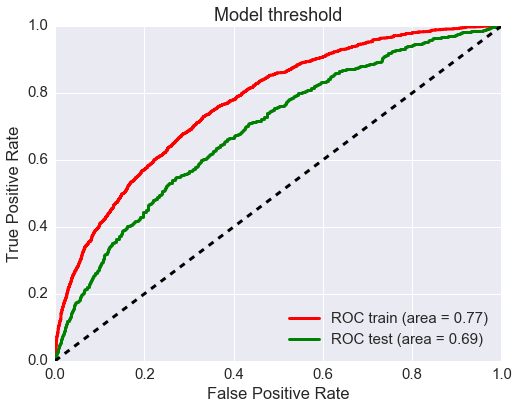

In [51]:
plt.figure(figsize=(8,6))
plt.plot(fpr_train_10k, tpr_train_10k, color = 'r')
plt.plot(fpr_test_10k, tpr_test_10k, color = 'g')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model threshold')
green_line = mlines.Line2D([], [], color='green', label='ROC test (area = %0.2f)' % np.mean(roc_auc_test_10k))
red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train_10k)
plt.legend(handles=[red_line, green_line],loc="lower right")
plt.savefig('ROC_best_model_10k.pdf')

In [52]:
roc_auc_train_10k

0.77206596883366541

In [53]:
roc_auc_test_10k

0.69087389034758695

# Use best parameters to train on full train data set

In [54]:
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
model_tuned = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
model_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
y_prob_train_tuned = model_tuned.predict_proba(X_train)

In [58]:
y_prob_test_tuned = model_tuned.predict_proba(X_test)

In [59]:
fpr_train_tuned, tpr_train_tuned, _ = metrics.roc_curve(y_train,y_prob_train_tuned[:,1])
roc_auc_train_tuned = metrics.auc(fpr_train_tuned, tpr_train_tuned)

In [60]:
fpr_test_tuned, tpr_test_tuned, _ = metrics.roc_curve(y_test,y_prob_test_tuned[:,1])
roc_auc_test_tuned = metrics.auc(fpr_test_tuned, tpr_test_tuned)

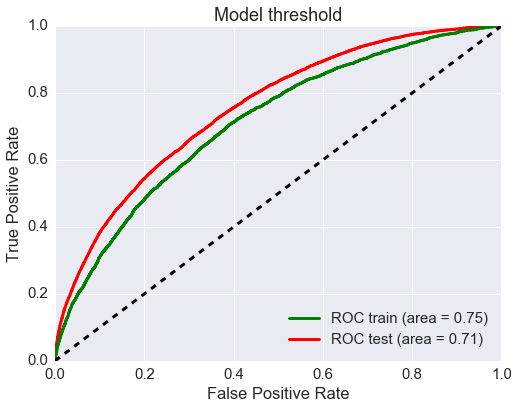

In [61]:
plt.figure(figsize=(8,6))
plt.plot(fpr_train_tuned, tpr_train_tuned, color = 'r')
plt.plot(fpr_test_tuned, tpr_test_tuned, color = 'g')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model threshold')
green_line = mlines.Line2D([], [], color='green', label='ROC train (area = %0.2f)' % np.mean(roc_auc_train_tuned))
red_line = mlines.Line2D([], [], color='red', label='ROC test (area = %0.2f)' % roc_auc_test_tuned)
plt.legend(handles=[green_line, red_line],loc="lower right")
plt.savefig('ROC_best_model.pdf')

In [62]:
roc_auc_train_tuned

0.75427587855917544

In [63]:
roc_auc_test_tuned

0.71330584015742271

# Better outcome with full data set?
Redo Grid Search with larger data set but limit parmeters more

In [64]:
rf = RandomForestClassifier()

In [65]:
parameters = {'n_estimators': [200,500],'max_depth':[100,250],'min_samples_leaf':[5]}

In [66]:
model_cv_grid = grid_search.GridSearchCV(rf,parameters,scoring='roc_auc',verbose=2,n_jobs=-1)

In [67]:
model_cv_grid.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_estimators=200, max_depth=100, min_samples_leaf=5 .............
[CV] .... n_estimators=200, max_depth=100, min_samples_leaf=5 -  38.1s
[CV] n_estimators=200, max_depth=100, min_samples_leaf=5 .............
[CV] .... n_estimators=200, max_depth=100, min_samples_leaf=5 -  37.5s
[CV] n_estimators=200, max_depth=100, min_samples_leaf=5 .............
[CV] .... n_estimators=200, max_depth=100, min_samples_leaf=5 -  37.6s
[CV] n_estimators=500, max_depth=100, min_samples_leaf=5 .............
[CV] .... n_estimators=500, max_depth=100, min_samples_leaf=5 - 1.7min
[CV] n_estimators=500, max_depth=100, min_samples_leaf=5 .............
[CV] .... n_estimators=500, max_depth=100, min_samples_leaf=5 - 1.8min
[CV] n_estimators=500, max_depth=100, min_samples_leaf=5 .............
[CV] .... n_estimators=500, max_depth=100, min_samples_leaf=5 - 1.6min
[CV] n_estimators=200, max_depth=250, min_samples_leaf=5 .............
[CV] .... n_estim

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 14.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_depth': [100, 250], 'min_samples_leaf': [5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [68]:
model_cv_grid.grid_scores_

[mean: 0.72096, std: 0.00217, params: {'n_estimators': 200, 'max_depth': 100, 'min_samples_leaf': 5},
 mean: 0.72181, std: 0.00265, params: {'n_estimators': 500, 'max_depth': 100, 'min_samples_leaf': 5},
 mean: 0.72132, std: 0.00348, params: {'n_estimators': 200, 'max_depth': 250, 'min_samples_leaf': 5},
 mean: 0.72176, std: 0.00195, params: {'n_estimators': 500, 'max_depth': 250, 'min_samples_leaf': 5}]

In [69]:
best_model_100k = model_cv_grid.best_estimator_

In [70]:
best_model_100k

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
df_importance_100k = pd.DataFrame({'variable': X_vec.columns, 'importance' : best_model_100k.feature_importances_})

In [73]:
df_importance_100k.sort_index().head()

,importance,variable
0,0.350314,DepTime
1,0.059219,Distance
2,0.004880,Month_c-1
3,0.004282,Month_c-10
4,0.003993,Month_c-11


In [74]:
y_prob_train_100k = best_model_100k.predict_proba(X_train)
y_prob_test_100k = best_model_100k.predict_proba(X_test)

In [75]:
fpr_train_100k, tpr_train_100k, _ = metrics.roc_curve(y_train,y_prob_train_100k[:,1])
roc_auc_train_100k = metrics.auc(fpr_train_100k, tpr_train_100k)

In [76]:
fpr_test_100k, tpr_test_100k, _ = metrics.roc_curve(y_test,y_prob_test_100k[:,1])
roc_auc_test_100k = metrics.auc(fpr_test_100k, tpr_test_100k)

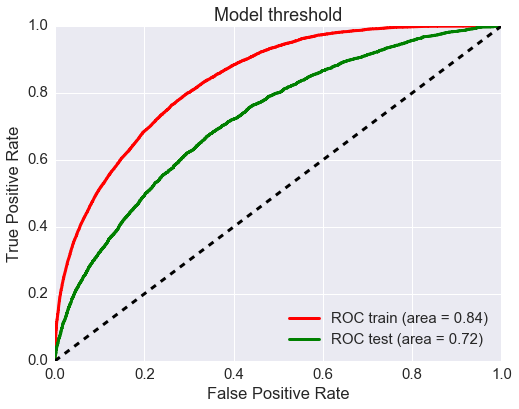

In [77]:
plt.figure(figsize=(8,6))
plt.plot(fpr_train_100k, tpr_train_100k, color = 'r')
plt.plot(fpr_test_100k, tpr_test_100k, color = 'g')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model threshold')
green_line = mlines.Line2D([], [], color='green', label='ROC test (area = %0.2f)' % np.mean(roc_auc_test_100k))
red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train_100k)
plt.legend(handles=[red_line, green_line],loc="lower right")
plt.savefig('ROC_best_model_100k.pdf')

In [78]:
roc_auc_train_100k

0.84007294996353399

In [79]:
roc_auc_test_100k

0.72435627030954286

In [80]:
roc_auc_test_10k

0.69087389034758695

In [81]:
roc_auc_test

0.65424060593567601

# Out-of-time Validation

In [82]:
y_prob_val_100k = best_model_100k.predict_proba(X_val)

In [83]:
fpr_val_100k, tpr_val_100k, _ = metrics.roc_curve(y_val,y_prob_val_100k[:,1])
roc_auc_val_100k = metrics.auc(fpr_val_100k, tpr_val_100k)

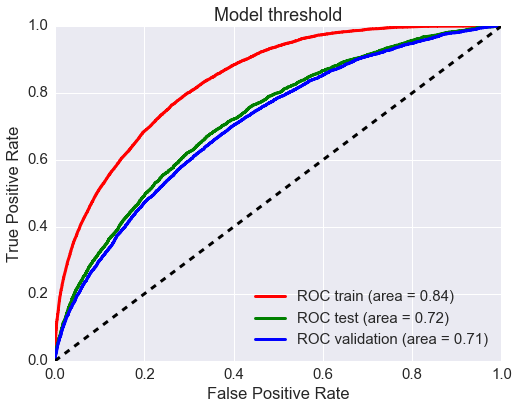

In [84]:
plt.figure(figsize=(8,6))
plt.plot(fpr_train_100k, tpr_train_100k, color = 'r')
plt.plot(fpr_test_100k, tpr_test_100k, color = 'g')
plt.plot(fpr_val_100k, tpr_val_100k, color = 'b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model threshold')
green_line = mlines.Line2D([], [], color='green', label='ROC test (area = %0.2f)' % np.mean(roc_auc_test_100k))
blue_line = mlines.Line2D([], [], color='blue', label='ROC validation (area = %0.2f)' % np.mean(roc_auc_val_100k))
red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train_100k)
plt.legend(handles=[red_line, green_line, blue_line],loc="lower right")
plt.savefig('ROC_best_model_100k_val.pdf')

In [85]:
y_prob_val_10k = best_model.predict_proba(X_val)

In [86]:
fpr_val_10k, tpr_val_10k, _ = metrics.roc_curve(y_val,y_prob_val_10k[:,1])
roc_auc_val_10k = metrics.auc(fpr_val_10k, tpr_val_10k)

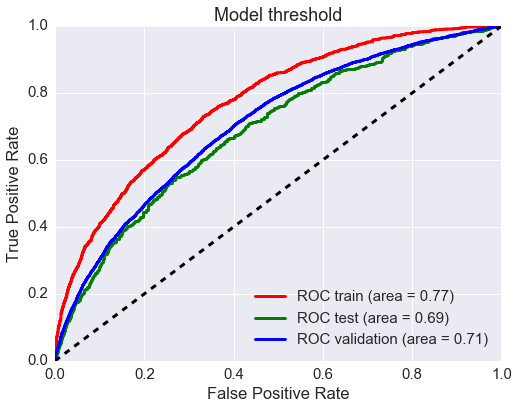

In [87]:
plt.figure(figsize=(8,6))
plt.plot(fpr_train_10k, tpr_train_10k, color = 'r')
plt.plot(fpr_test_10k, tpr_test_10k, color = 'g')
plt.plot(fpr_val_10k, tpr_val_10k, color = 'b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model threshold')
green_line = mlines.Line2D([], [], color='green', label='ROC test (area = %0.2f)' % np.mean(roc_auc_test_10k))
blue_line = mlines.Line2D([], [], color='blue', label='ROC validation (area = %0.2f)' % np.mean(roc_auc_val_10k))
red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train_10k)
plt.legend(handles=[red_line, green_line, blue_line],loc="lower right")
plt.savefig('ROC_best_model_10k_val.pdf')

In [88]:
precision_val, recall_val, thresholds_val = metrics.precision_recall_curve(y_val,y_prob_val_100k[:,1])

In [89]:
thresholds_val = np.append(thresholds_val, 1)
queue_rate_val = []  
for threshold in thresholds_val:  
    queue_rate_val.append((y_prob_val_100k[:,1] >= threshold).mean())

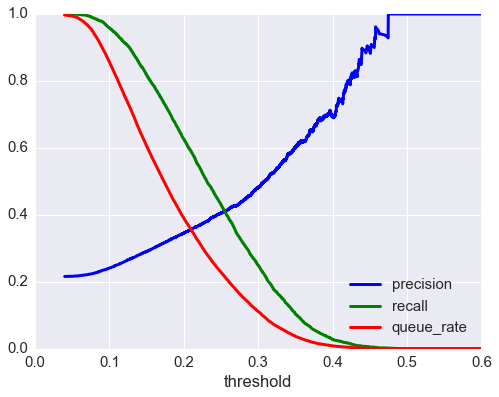

In [90]:
plt.figure(figsize=(8,6))
plt.plot(thresholds_val, precision_val, color = 'b', linewidth=3.0)  
plt.plot(thresholds_val, recall_val, color = 'g', linewidth=3.0)  
plt.plot(thresholds_val, queue_rate_val, color = 'r', linewidth=3.0)
leg = plt.legend(('precision', 'recall', 'queue_rate'),loc="lower right")
plt.xlabel('threshold')
plt.xlim([0.0, 0.6])
plt.savefig('prec_recall_best_model_100k_val.pdf')

In [91]:
y_prob = best_model_100k.predict_proba(X_vec)

In [92]:
df['score'] = y_prob[:,1]

In [93]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,score
0,2006,c-11,c-22,c-3,1316,AA,FAT,DFW,1313,N,0.145031
1,2004,c-10,c-12,c-2,1242,US,SAN,PHL,2369,N,0.141134
2,2006,c-5,c-5,c-5,1302,OO,SBP,SFO,191,Y,0.230834
3,2005,c-8,c-8,c-1,1138,DL,PHL,ATL,665,N,0.145066
4,2005,c-4,c-3,c-7,1438,DL,ATL,BDL,859,N,0.165752


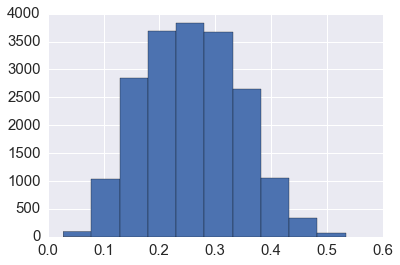

In [94]:
df[df['dep_delayed_15min'] == 'Y']['score'].hist()

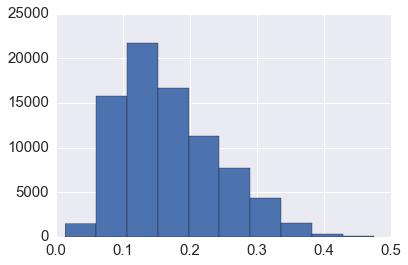

In [95]:
df[df['dep_delayed_15min'] == 'N']['score'].hist()

In [96]:
df['DepHour'] = df['DepTime'].apply(lambda x: str(x).zfill(4)).apply(lambda x: int(x[0:2]))

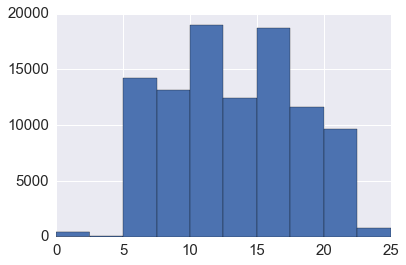

In [97]:
df['DepHour'].hist()

In [98]:
ind_25 = df[df['DepHour'] == 25].index

In [99]:
df['DepHour'].loc[ind_25] = 0

//anaconda/envs/python2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [100]:
df['DepHour'].loc[ind_25]

70428    0
90131    0
Name: DepHour, dtype: int64

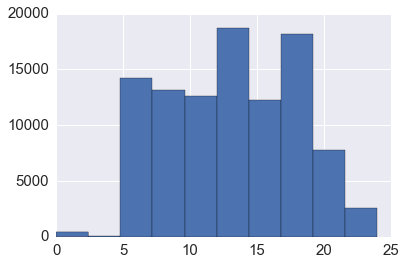

In [101]:
df['DepHour'].hist()

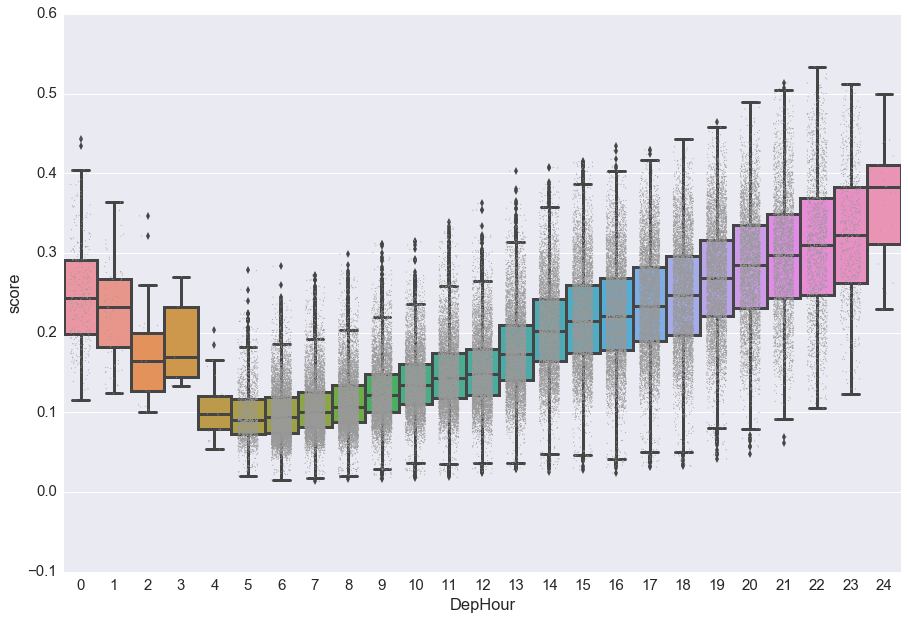

In [105]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="DepHour", y="score"
                    ,data=df.sort_values(by="DepHour")
                    ,orient='v', width=1)
sns.stripplot(x="DepHour", y="score"
                    ,data=df.sort_values(by="DepHour")
                    ,orient='v',jitter=0.3, size=1
                    , color="0.6",edgecolor="gray")

In [106]:
df['Distance'].max()

4962

In [107]:
bins=np.arange(0,5000,500)
grouped = df['Distance'].groupby(pd.cut(df['Distance'],bins))

In [108]:
df['distance_band'] = pd.cut(df['Distance'],bins)

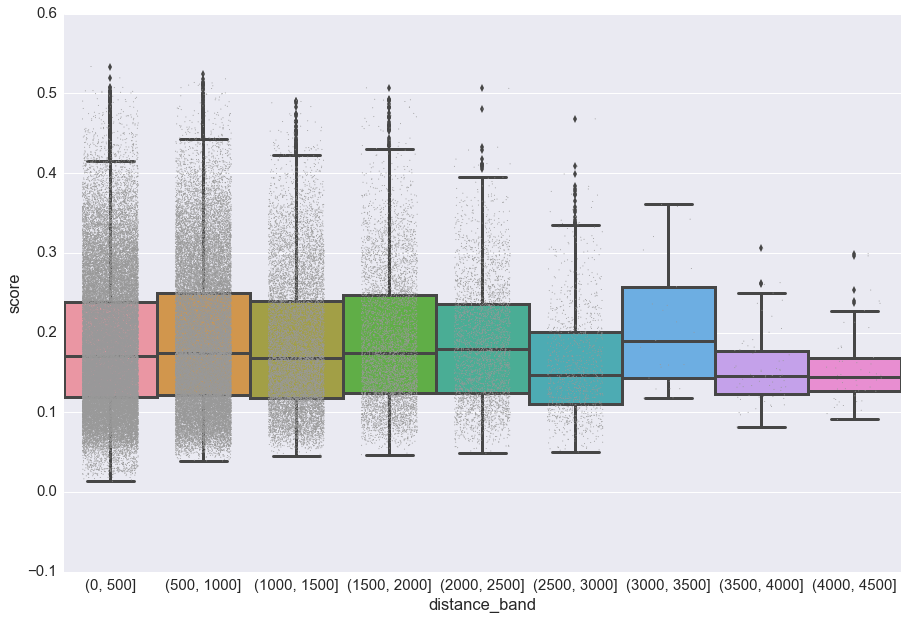

In [109]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="distance_band", y="score"
                    ,data=df.sort_values(by="distance_band")
                    ,orient='v', width=1)
sns.stripplot(x="distance_band", y="score"
                    ,data=df.sort_values(by="distance_band")
                    ,orient='v',jitter=0.3, size=1
                    , color="0.6",edgecolor="gray")

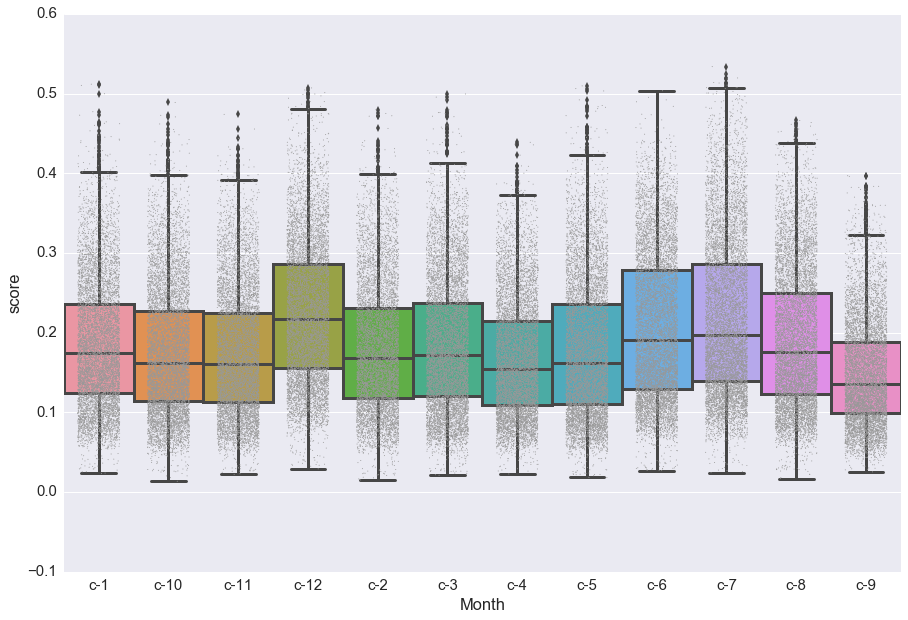

In [110]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="Month", y="score"
                    ,data=df.sort_values(by="Month")
                    ,orient='v', width=1)
sns.stripplot(x="Month", y="score"
                    ,data=df.sort_values(by="Month")
                    ,orient='v',jitter=0.3, size=1
                    , color="0.6",edgecolor="gray")